# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [12]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


#### Génération de donnée synthétiques...

In [13]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


#### Régression linéaire avec régularisation Lasso ...


In [14]:

from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


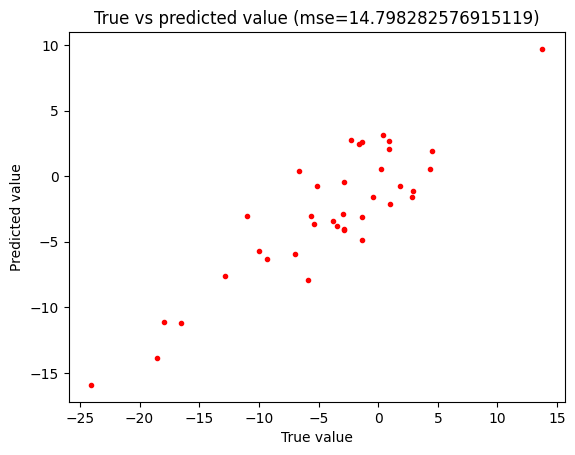

In [15]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



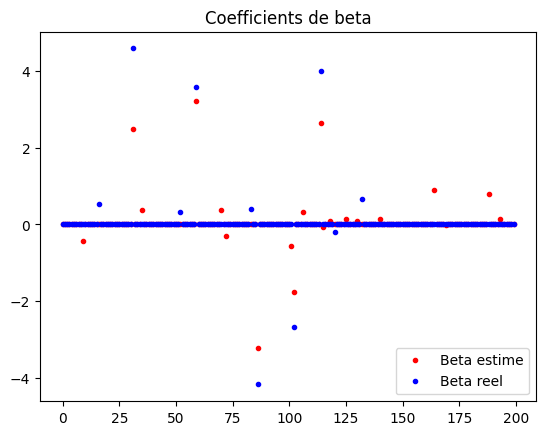

In [16]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()



### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :

...



### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

In [ ]:

from sklearn.model_selection import KFold

NBfolds = 8

# estimation ordre de grandeur de alpha

for alpha in [0.001, 0.01, 0.1, 1, 10]:

    sum_mse_score = 0

    kf = KFold(n_splits=NBfolds)

    for train_index, test_index in kf.split(X):

        X_train=X[train_index]
        y_train=y[train_index]
        X_test=X[test_index]
        y_test=y[test_index]
  
        lasso_regressor = Lasso(alpha=alpha)
        lasso_regressor.fit(X_train, y_train)

        y_pred_lasso = lasso_regressor.predict(X_test)
        mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
        sum_mse_score += mse_score_lasso

    print(f'Alpha = {alpha}: Mean MSE = {sum_mse_score / NBfolds}')


Alpha = 0.001: Mean MSE = 22.669451483667068
Alpha = 0.01: Mean MSE = 14.279992374168355
Alpha = 0.1: Mean MSE = 11.00098340640826
Alpha = 1: Mean MSE = 15.32789734007311
Alpha = 10: Mean MSE = 75.72210367055503


/home/mqtho/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+00, tolerance: 5.140e-01
  model = cd_fast.enet_coordinate_descent(
/home/mqtho/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.122e-01, tolerance: 4.899e-01
  model = cd_fast.enet_coordinate_descent(
/home/mqtho/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [22]:
# estimation plus fine

for alpha in [0.025,0.05,0.1,0.2,0.4,0.8]:
  sum_mse_scores=0.
  kf = KFold(n_splits=NB_folds)
  for train, test in kf.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso

  print(alpha," mean MSE: ",sum_mse_scores/NB_folds)

0.025  mean MSE:  13.614445436477776
0.05  mean MSE:  12.904579116327195
0.1  mean MSE:  11.00098340640826
0.2  mean MSE:  9.203701952058172
0.4  mean MSE:  9.212862708317793
0.8  mean MSE:  12.327123036946238


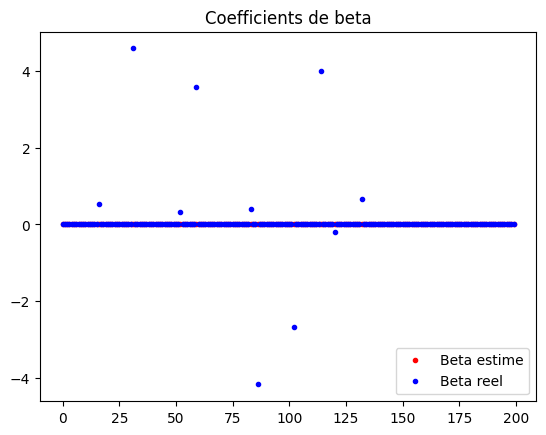

In [21]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


In [ ]:
from sklearn.linear_model import LinearRegression

# A partir d'une liste de variables, ajoute la "meilleure" suivante au sens du critère BIC
def bic_forward_step(selected_variables,X_train,y_train,X_test,y_test):
    bic_curr = np.inf
    best_variable = -1
    for i in range(p):
        if i not in selected_variables:
            select_var_temp = selected_variables.copy()
            select_var_temp.append(i)
            
            # LR avec cette observation en plus
            lr = LinearRegression()
            lr.fit(X_train[:, select_var_temp], y_train)
            
            # Critère de BIC
            y_p = lr.predict(X_test[:, select_var_temp])
            MSE_M = np.mean(np.power(y_p - y_test,2))
            bic_new = n * np.log(MSE_M) + np.log(n) * (len(select_var_temp) + 1)
            
            if bic_new < bic_curr:
                bic_curr = bic_new
                best_variable = i
    
    # On prend le i qui minimise BIC
    return bic_curr, best_variable



In [ ]:
#split training and test data
#X_train=X[:50,:]
#y_train=y[:50]
#X_test=X[50:,:]
#y_test=y[50:]


sum_mse_scores=0.
kf = KFold(n_splits=NB_folds)
for train, test in kf.split(X):
    print('Fold')
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    
    #init
    bic_best = np.inf
    selected_variables = []
    new_bic, new_ind = bic_forward_step(selected_variables,X_train,y_train,X_test,y_test)
    
    #iterative forward selection
    while new_bic < bic_best and len(selected_variables)<p: # tant que le bic décroît et tant que toutes les variables n'ont pas été introduites, on continue
        selected_variables.append(new_ind)
        bic_best = new_bic
        new_bic, new_ind = bic_forward_step(selected_variables,X_train,y_train,X_test,y_test)
        
    #linear regression with selected variables
    lr_bic = LinearRegression()
    lr_bic.fit(X_train[:, selected_variables], y_train)
    y_p_bic = lr_bic.predict(X_test[:, selected_variables])
    
    mse_bic = mean_squared_error(y_p_bic, y_test)
    
    sum_mse_scores+=mse_bic

Fold
Fold
Fold
Fold
Fold
Fold
Fold
Fold


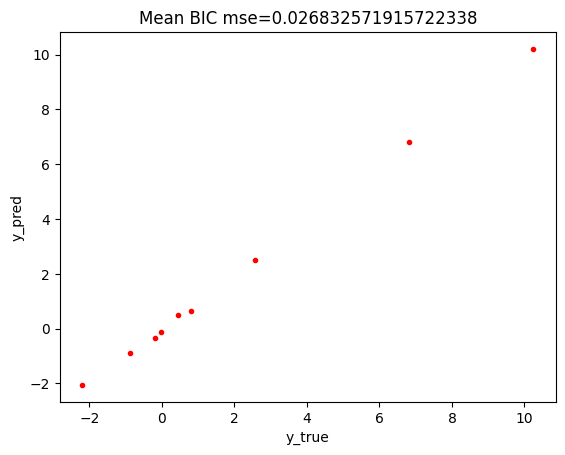

In [25]:
#show the results
plt.figure()
plt.plot(y_test, y_p_bic, 'r.')
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.title("Mean BIC mse="+str(sum_mse_scores/NB_folds))
plt.show()

In [26]:
print('Variables sélectionnées :',np.sort(selected_variables))

print('Variables utilisées lors de la génération des données :',np.where(beta>0))

Variables sélectionnées : [  5   6  32  34  49  56  60  88 105 111 162 174 184 186 195 197]
Variables utilisées lors de la génération des données : (array([ 16,  31,  52,  59,  83, 114, 132]),)
